Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import warnings
warnings.simplefilter('ignore')

Importing  Training Files. 

In [2]:
trainText = pd.read_csv('text_train_5_df.txt')
trainAudio = pd.read_csv('audio_train_df.txt')
trainVideo = pd.read_csv('visual_train_df.txt')
trainVideo.bully[trainVideo.bully == 'bullying'] = 1
trainVideo.bully[trainVideo.bully == 'noneBll'] = 0
# trainVideo.bully[trainVideo.bully == 'bullying'] = 1
# trainVideo.bully[trainVideo.bully == 'noneBll'] = 0

Importing Testdata Files, where visual_test_df.txt contains the label for genders

In [3]:
testText = pd.read_csv('text_test_5_df.txt')
testAudio = pd.read_csv('audio_test_df.txt')
testVideo = pd.read_csv('visual_test_df.txt')
testVideo.bully[testVideo.bully == 'bullying'] = 1
testVideo.bully[testVideo.bully == 'noneBll'] = 0
# testVideo.bully[testVideo.bully == 'bullying'] = 1
# testVideo.bully[testVideo.bully == 'noneBll'] = 0

Combining the dataset for Audio, Text and Video

In [4]:
x1train = trainAudio.iloc[:, 1:-2]
x2train = trainVideo.iloc[:, :-2]
x3train = trainText.iloc[:, 1:-2]
xtrain = pd.concat([x1train, x3train, x2train], axis=1, sort=False)
ytrain = trainVideo.iloc[:, -1]
ytrain=ytrain.astype('int')

Combining the test data and then separating it into two where one contains all the male records and the other contains all the female records.

In [5]:
x1test = testAudio.iloc[:, 1:-2]
x2test = testVideo.iloc[:, :]
x3test = testText.iloc[:, 1:-2]
xtest = pd.concat([x1test, x3test, x2test], axis=1, sort=False)
xtestm = xtest[xtest['Gender'] == 'Male']
xtestf = xtest[xtest['Gender'] == 'Female']
ytestm = xtestm.iloc[:, -2]
xtestm = xtestm.iloc[:, :-3]
ytestf = xtestf.iloc[:, -2]
xtestf = xtestf.iloc[:, :-3]
ytestm = ytestm.astype('int')
ytestf = ytestf.astype('int')

All the Classifiers used along with the metrics for evaluation.
1.SVM 
2.Gaussian Naive Bayes
3.Logistic Regression
4.Random Forest

In [6]:
avSVM = svm.SVC(kernel = 'linear', C = 10)
avSVM.fit(xtrain, ytrain)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

------------------------------Male-------------------------------
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       117
           1       0.57      0.66      0.61        32

   micro avg       0.82      0.82      0.82       149
   macro avg       0.73      0.76      0.75       149
weighted avg       0.83      0.82      0.82       149

[[101  16]
 [ 11  21]]


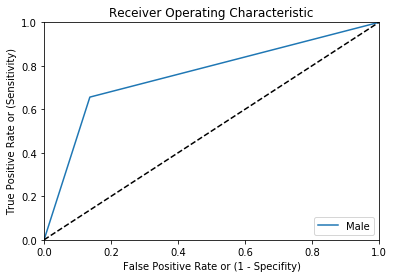

------------------------------Female-------------------------------
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        50
           1       0.61      0.55      0.58        20

   micro avg       0.77      0.77      0.77        70
   macro avg       0.72      0.71      0.71        70
weighted avg       0.77      0.77      0.77        70

[[43  7]
 [ 9 11]]
[0.   0.14 1.  ] [0.   0.55 1.  ]


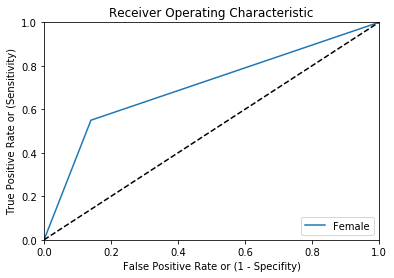

In [20]:
print ('------------------------------Male-------------------------------')
ypredSVM = avSVM.predict(xtestm)  
print(classification_report(ytestm.values, ypredSVM))
print(confusion_matrix(ytestm.values, ypredSVM)) 
fpr, tpr, thresholds = roc_curve(ytestm.values, ypredSVM)
plt.plot(fpr, tpr, label='Male')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print ('------------------------------Female-------------------------------')
ypredSVM = avSVM.predict(xtestf)  
print(classification_report(ytestf.values, ypredSVM))
print(confusion_matrix(ytestf.values, ypredSVM)) 
fpr, tpr, thresholds = roc_curve(ytestf.values, ypredSVM)
print (fpr)
print (tpr)
plt.plot(fpr, tpr, label='Female')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [21]:
avGaussianNB = GaussianNB()
avGaussianNB.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

------------------------------Male-------------------------------
              precision    recall  f1-score   support

           0       0.94      0.71      0.81       117
           1       0.44      0.84      0.58        32

   micro avg       0.74      0.74      0.74       149
   macro avg       0.69      0.78      0.70       149
weighted avg       0.84      0.74      0.76       149

[[83 34]
 [ 5 27]]
[0.         0.29059829 1.        ]
[0.      0.84375 1.     ]


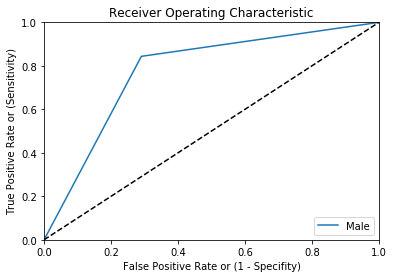

------------------------------Female-------------------------------
              precision    recall  f1-score   support

           0       0.95      0.74      0.83        50
           1       0.58      0.90      0.71        20

   micro avg       0.79      0.79      0.79        70
   macro avg       0.76      0.82      0.77        70
weighted avg       0.84      0.79      0.80        70

[[37 13]
 [ 2 18]]
[0.   0.26 1.  ]
[0.  0.9 1. ]


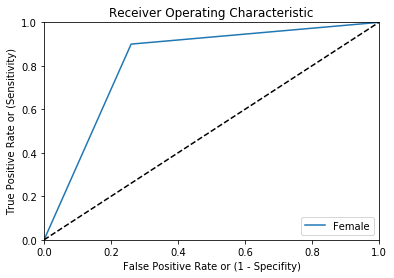

In [23]:
print ('------------------------------Male-------------------------------')
ypredNB = avGaussianNB.predict(xtestm)
print(classification_report(ytestm.values, ypredNB))
print(confusion_matrix(ytestm.values, ypredNB)) 
fpr, tpr, thresholds = roc_curve(ytestm.values, ypredNB)
print (fpr)
print (tpr)
plt.plot(fpr, tpr, label='Male')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print ('------------------------------Female-------------------------------')
ypredNB = avGaussianNB.predict(xtestf)
print(classification_report(ytestf.values, ypredNB))
print(confusion_matrix(ytestf.values, ypredNB)) 
fpr, tpr, thresholds = roc_curve(ytestf.values, ypredNB)
print (fpr)
print (tpr)
plt.plot(fpr, tpr, label='Female')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [24]:
avLR = LogisticRegression()
avLR.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

------------------------------Male-------------------------------
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       117
           1       0.58      0.44      0.50        32

   micro avg       0.81      0.81      0.81       149
   macro avg       0.72      0.68      0.69       149
weighted avg       0.80      0.81      0.80       149

[[107  10]
 [ 18  14]]
[0.         0.08547009 1.        ]
[0.     0.4375 1.    ]


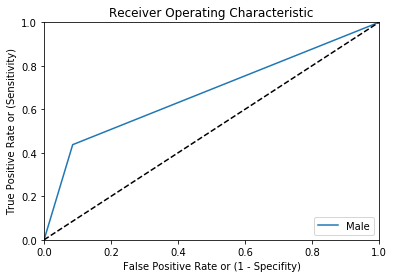

------------------------------Female-------------------------------
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        50
           1       0.59      0.50      0.54        20

   micro avg       0.76      0.76      0.76        70
   macro avg       0.70      0.68      0.69        70
weighted avg       0.75      0.76      0.75        70

[[43  7]
 [10 10]]
[0.   0.14 1.  ]
[0.  0.5 1. ]


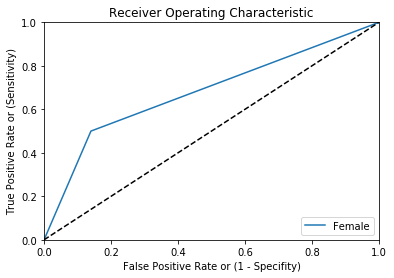

In [26]:
print ('------------------------------Male-------------------------------')
ypredLR = avLR.predict(xtestm)
print(classification_report(ytestm.values, ypredLR))
print(confusion_matrix(ytestm.values, ypredLR))
fpr, tpr, thresholds = roc_curve(ytestm.values, ypredLR)
print (fpr)
print (tpr)
plt.plot(fpr, tpr, label='Male')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print ('------------------------------Female-------------------------------')
ypredLR = avLR.predict(xtestf)
print(classification_report(ytestf.values, ypredLR))
print(confusion_matrix(ytestf.values, ypredLR))
fpr, tpr, thresholds = roc_curve(ytestf.values, ypredLR)
print (fpr)
print (tpr)
plt.plot(fpr, tpr, label='Female')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [28]:
avRF = RandomForestClassifier(n_estimators=100, random_state=0)
avRF.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

------------------------------Male-------------------------------
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       117
           1       0.68      0.47      0.56        32

   micro avg       0.84      0.84      0.84       149
   macro avg       0.77      0.70      0.73       149
weighted avg       0.83      0.84      0.83       149

[[110   7]
 [ 17  15]]
[0.         0.05982906 1.        ]
[0.      0.46875 1.     ]


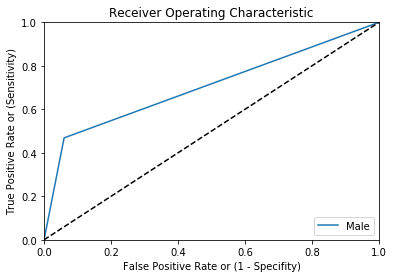

------------------------------Female-------------------------------
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        50
           1       0.43      0.15      0.22        20

   micro avg       0.70      0.70      0.70        70
   macro avg       0.58      0.54      0.52        70
weighted avg       0.64      0.70      0.65        70

[[46  4]
 [17  3]]
[0.   0.08 1.  ]
[0.   0.15 1.  ]


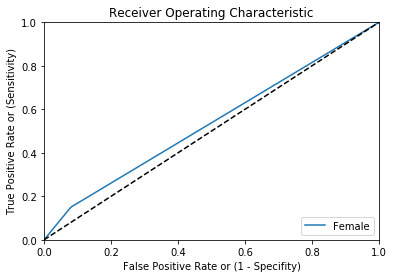

In [29]:
print ('------------------------------Male-------------------------------')
ypredRF = avRF.predict(xtestm)
print(classification_report(ytestm.values, ypredRF))
print(confusion_matrix(ytestm.values, ypredRF))
fpr, tpr, thresholds = roc_curve(ytestm.values, ypredRF)
print (fpr)
print (tpr)
plt.plot(fpr, tpr, label='Male')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print ('------------------------------Female-------------------------------')
ypredRF = avRF.predict(xtestf)
print(classification_report(ytestf.values, ypredRF))
print(confusion_matrix(ytestf.values, ypredRF))
fpr, tpr, thresholds = roc_curve(ytestf.values, ypredRF)
print (fpr)
print (tpr)
plt.plot(fpr, tpr, label='Female')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Comments: There were some videos where they contained some random clips like simpsons, Football Games, etc and all of them were non bullied. But for labelling them, I labelled  as male and female, depending on the voice in the video etc.And also there were very few cases of bullying and in those cases, females were very less as compared to the males.<br /> 
Thank You. -Deep Pandya**

In [4]:
trainVideo

,VISUAL_num_faces,VISUAL_valence,VISUAL_arousal,VISUAL_gore,VISUAL_explicit,VISUAL_drug,VISUAL_suggestive,VISUAL_ocr_len,VISUAL_labels1,VISUAL_labels2,VISUAL_labels3,id,bully
0,0,-0.077227,0.003346,0.121265,0.176929,0.071883,0.095077,0.000000,-0.140656,0.422714,-0.051598,1078788598574231552,1
1,0,0.000000,0.000000,0.000055,0.000070,0.000127,0.000150,3.833333,0.282171,0.121673,0.064595,1115991006584987648,0
2,0,0.000000,0.000000,0.003495,0.194472,0.067911,0.231171,0.000000,0.085947,-0.221446,0.021952,1010803384435216384,0
3,0,-0.017639,0.006521,0.007416,0.012575,0.023416,0.208229,0.000000,-0.140205,-0.240972,0.198791,1003042166966312960,0
4,0,0.000000,0.000000,0.004017,0.111526,0.078706,0.190193,0.000000,0.347749,-0.224979,-0.068936,1015768740903772160,0
5,0,0.000005,-0.000021,0.000072,0.006697,0.001807,0.055760,8.000000,0.090469,0.489252,0.127482,1140064326645075968,0
6,1,-0.075404,0.003788,0.002293,0.609185,0.026073,0.101774,0.000000,-0.099974,0.226055,-0.221616,1128105482884636672,0
7,0,0.000000,0.000000,0.000678,0.004280,0.010150,0.013891,0.666667,0.469513,0.460863,0.343948,1160685224867364864,0
8,0,-0.035666,0.001892,0.001473,0.282130,0.009103,0.217175,0.000000,-0.427926,-0.041873,-0.093955,1083946694279860224,0
9,0,-0.012337,0.000908,0.003219,0.307250,0.019809,0.030318,0.000000,0.236076,-0.103658,-0.256599,1095091242351857664,0


In [5]:
testVideo

,VISUAL_num_faces,VISUAL_valence,VISUAL_arousal,VISUAL_gore,VISUAL_explicit,VISUAL_drug,VISUAL_suggestive,VISUAL_ocr_len,VISUAL_labels1,VISUAL_labels2,VISUAL_labels3,id,bully,Gender
0,0,0.000216,-0.001571,0.000040,0.000084,0.000021,0.000259,50.333333,0.496232,-0.119891,-0.360106,1097549752872361984,0,Male
1,0,0.000000,0.000000,0.000541,0.180557,0.000418,0.003102,0.833333,-0.078825,-0.080264,0.126789,1033243846865473536,0,Female
2,0,0.000000,0.000000,0.001532,0.213579,0.003477,0.091714,0.000000,-0.189151,-0.079811,0.157449,1134017703750103040,0,Female
3,0,-0.020595,0.007412,0.002860,0.066069,0.384289,0.032618,0.000000,-0.170455,-0.079290,-0.021838,1008090316898803712,1,Male
4,0,0.002220,-0.012335,0.001191,0.298208,0.008274,0.259024,0.000000,-0.331013,0.319631,-0.242877,991891149956562944,1,Female
5,0,-0.005202,-0.002192,0.000074,0.052560,0.000219,0.007356,46.333333,0.396004,0.461614,0.315411,1181756604215922688,0,Male
6,0,-0.005243,0.003746,0.001676,0.040424,0.005906,0.150555,0.000000,-0.184803,-0.040057,-0.179265,1125144559953797120,1,Male
7,0,-0.001201,0.002342,0.000605,0.230667,0.002643,0.455044,0.000000,-0.339757,0.050250,-0.032019,1129971720628121600,0,Female
8,1,-0.061598,0.009171,0.002700,0.126166,0.004204,0.335686,0.000000,-0.347038,0.153520,-0.128837,1050987543383937024,1,Female
9,0,-0.004910,0.004215,0.000283,0.419981,0.000524,0.286285,0.000000,-0.270678,-0.133470,-0.065792,1178570675292639232,0,Male
